In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
df.drop(['RowNumber','Surname'] ,errors='ignore', axis=1, inplace=True )
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = df.rename(columns={
    'CreditScore': 'Score',
    'Geography': 'Country',
    'HasCrCard': 'Has_credit',
    'IsActiveMember': 'Active',
    'EstimatedSalary': 'Salary'
})
df.head()

,CustomerId,Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,Has_credit,Active,Salary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
print(df.isnull().sum())  # لتأكيد عدم وجود قيم مفقودة

CustomerId       0
Score            0
Country          0
Gender           0
Age              0
Tenure           0
Balance          0
NumOfProducts    0
Has_credit       0
Active           0
Salary           0
Exited           0
dtype: int64

In [11]:
df.groupby('Country').Exited.mean()* 100

Country
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [12]:
df.groupby('Country')['Exited'].count()

Country
France     5014
Germany    2509
Spain      2477
Name: Exited, dtype: int64

In [13]:
avg = df.groupby('Exited')['Score'].mean()
print(avg)

Exited
0    651.853196
1    645.351497
Name: Score, dtype: float64


In [14]:
df.groupby('Gender')['Exited'].mean() * 100


Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

In [15]:
df.groupby('NumOfProducts')['Exited'].mean() * 100


NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

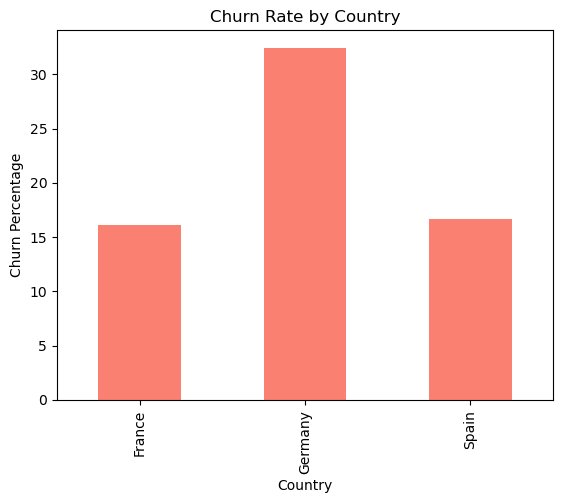

In [16]:
churn_by_country = df.groupby('Country')['Exited'].mean() * 100
churn_by_country.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Country')
plt.ylabel('Churn Percentage')
plt.xlabel('Country')
plt.show()

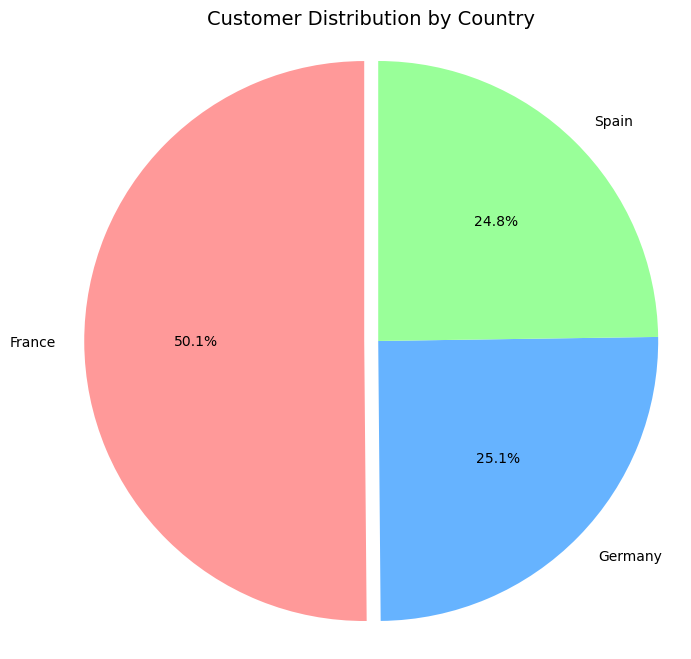

In [17]:
country_counts = df['Country'].value_counts()
labels = country_counts.index
sizes = country_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']  
explode = (0.05, 0, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Country', fontsize=14)
plt.axis('equal')  
plt.show()

In [18]:
df.Salary.mean()

100090.239881

In [19]:
df.Salary.median()

100193.915

In [20]:
df.groupby('Country')['Salary'].agg(['mean', 'min', 'max'])

,mean,min,max
Country,,,
France,99899.180814,90.07,199929.17
Germany,101113.435102,11.58,199970.74
Spain,99440.572281,417.41,199992.48


In [21]:
cols = ['Score', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Salary']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f' {col}: {outliers.shape[0]}')

 Score: 15
 Age: 359
 Tenure: 0
 Balance: 0
 NumOfProducts: 60
 Salary: 0


 Lower Bound: 14.0
 Upper Bound: 62.0


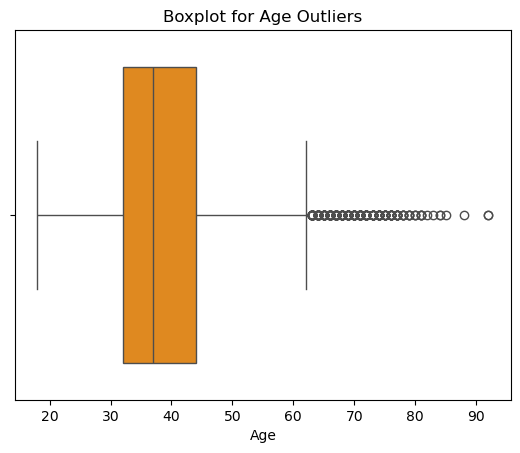

In [22]:
sns.boxplot(x=df['Age'], color='darkorange')
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Lower Bound: {lower_bound}")
print(f" Upper Bound: {upper_bound}")

plt.title('Boxplot for Age Outliers')
plt.xlabel('Age')
plt.show()

 Lower Bound: 383.0
 Upper Bound: 919.0


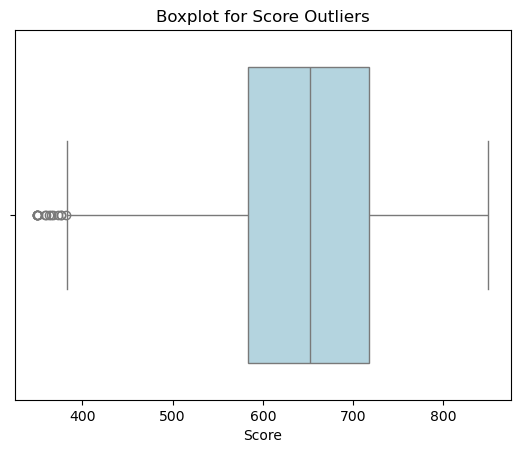

In [23]:
sns.boxplot(x=df['Score'], color='lightblue')
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Lower Bound: {lower_bound}")
print(f" Upper Bound: {upper_bound}")

plt.title('Boxplot for Score Outliers')
plt.xlabel('Score')
plt.show()

 Lower Bound: -0.5
 Upper Bound: 3.5


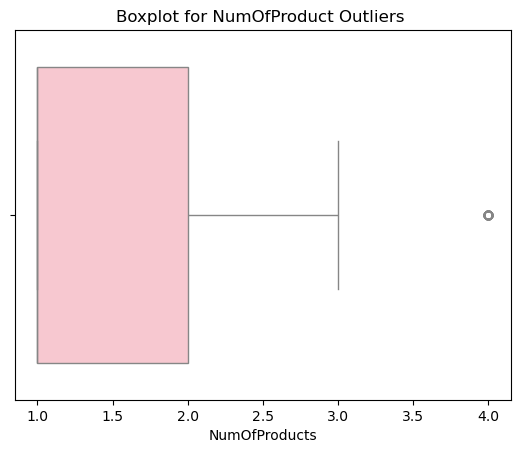

In [24]:
sns.boxplot(x=df['NumOfProducts'], color='pink')
Q1 = df['NumOfProducts'].quantile(0.25)
Q3 = df['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Lower Bound: {lower_bound}")
print(f" Upper Bound: {upper_bound}")

plt.title('Boxplot for NumOfProduct Outliers ')
plt.xlabel('NumOfProducts')
plt.show()

 Lower Bound: -191466.36000000002
 Upper Bound: 319110.60000000003


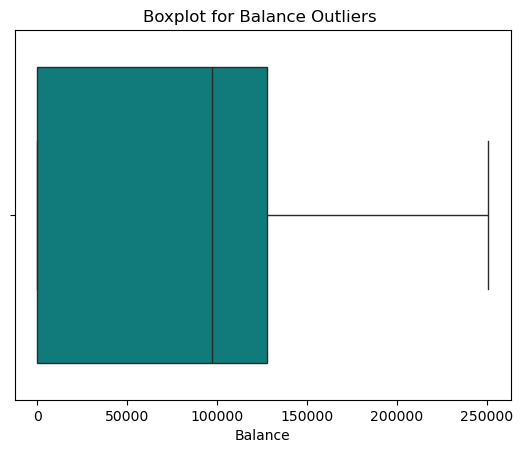

In [25]:
sns.boxplot(x=df['Balance'], color='darkcyan')
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Lower Bound: {lower_bound}")
print(f" Upper Bound: {upper_bound}")

plt.title('Boxplot for Balance Outliers ')
plt.xlabel('Balance')
plt.show()

 Lower Bound: -96577.09624999999
 Upper Bound: 296967.45375


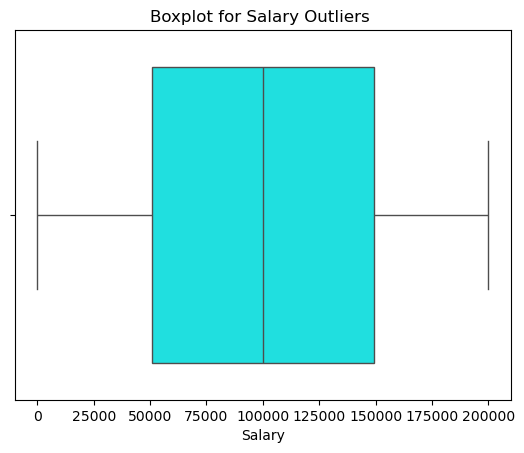

In [26]:
sns.boxplot(x=df['Salary'], color='cyan')
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Lower Bound: {lower_bound}")
print(f" Upper Bound: {upper_bound}")

plt.title('Boxplot for Salary Outliers ')
plt.xlabel('Salary')
plt.show()

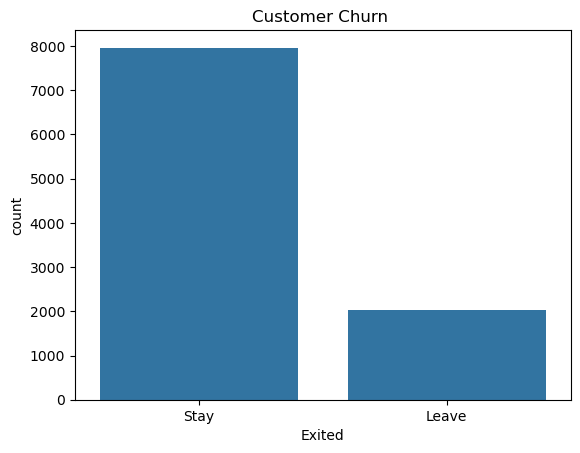

In [27]:
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn ')
plt.xticks([0, 1], ['Stay', 'Leave'])
plt.show()

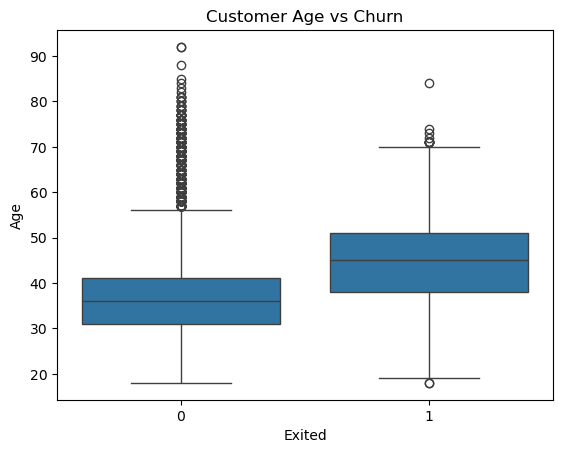

In [28]:
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Customer Age vs Churn')
plt.show()

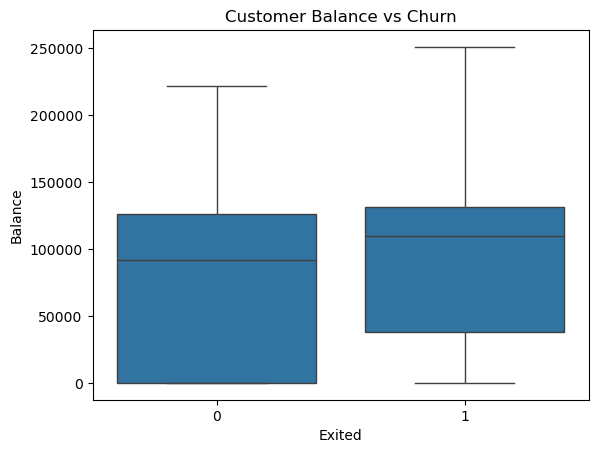

In [29]:
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title('Customer Balance vs Churn')
plt.show()

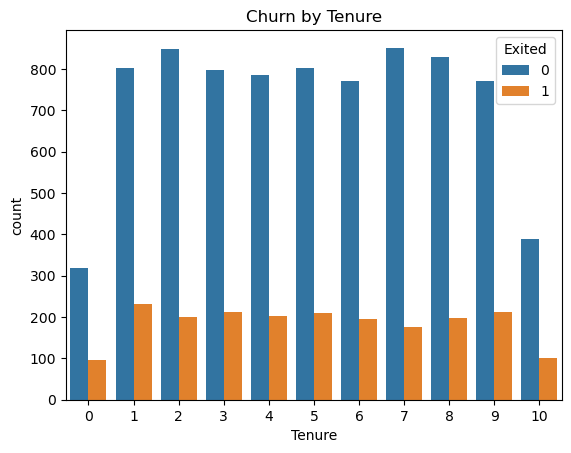

In [30]:
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Churn by Tenure')
plt.show()

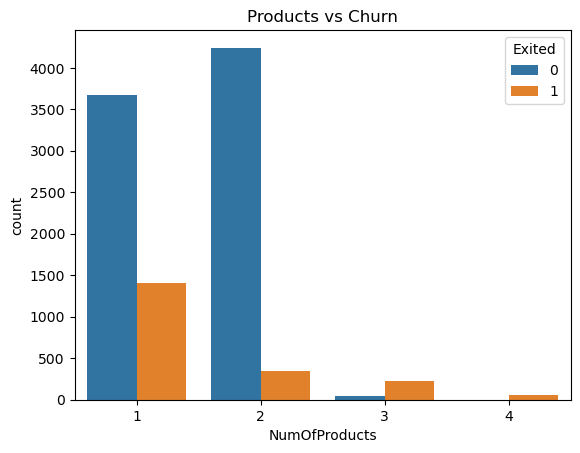

In [31]:
# رسم العلاقة بين عدد المنتجات وترك البنك
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Products vs Churn')
plt.show()

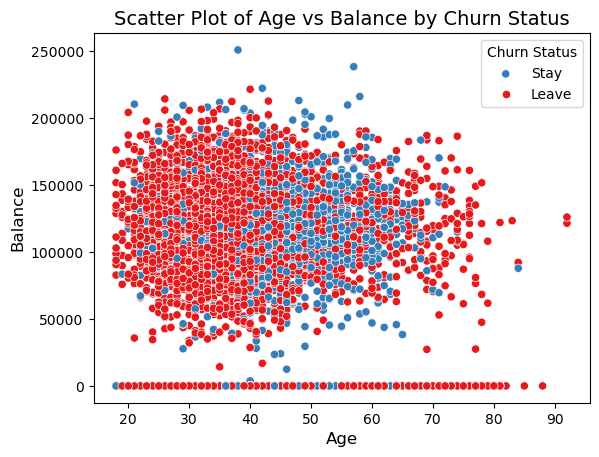

In [32]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, palette='Set1')
plt.title('Scatter Plot of Age vs Balance by Churn Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.legend(title='Churn Status', labels=['Stay', 'Leave'])
plt.show()

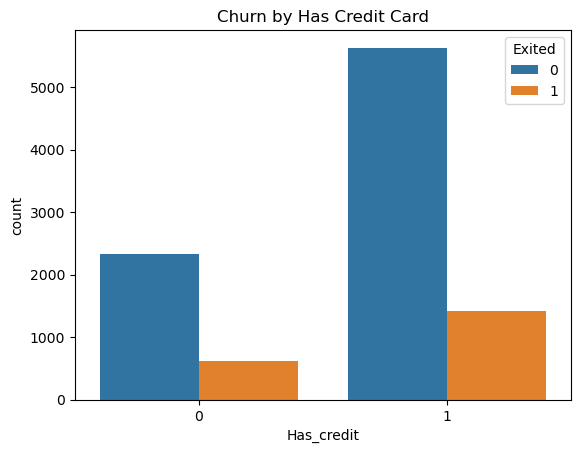

In [33]:
sns.countplot(x='Has_credit', hue='Exited', data=df)
plt.title('Churn by Has Credit Card')
plt.show()

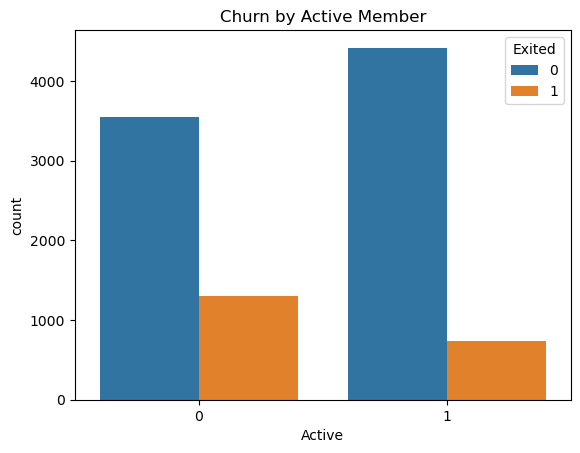

In [34]:
sns.countplot(x='Active', hue='Exited', data=df)
plt.title('Churn by Active Member')
plt.show()

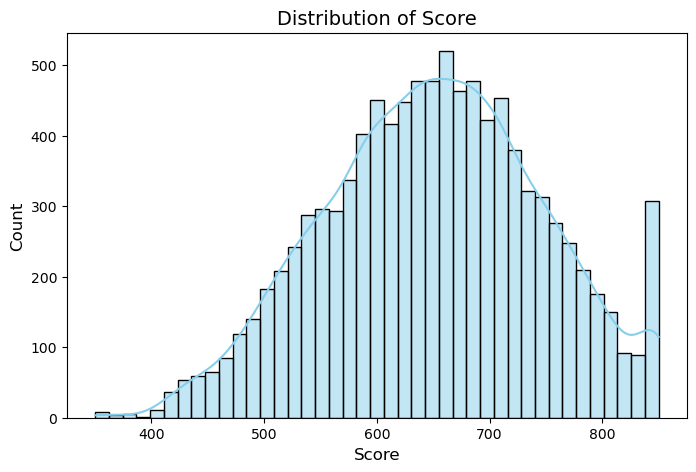

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], kde=True, color='skyblue')
plt.title('Distribution of Score', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

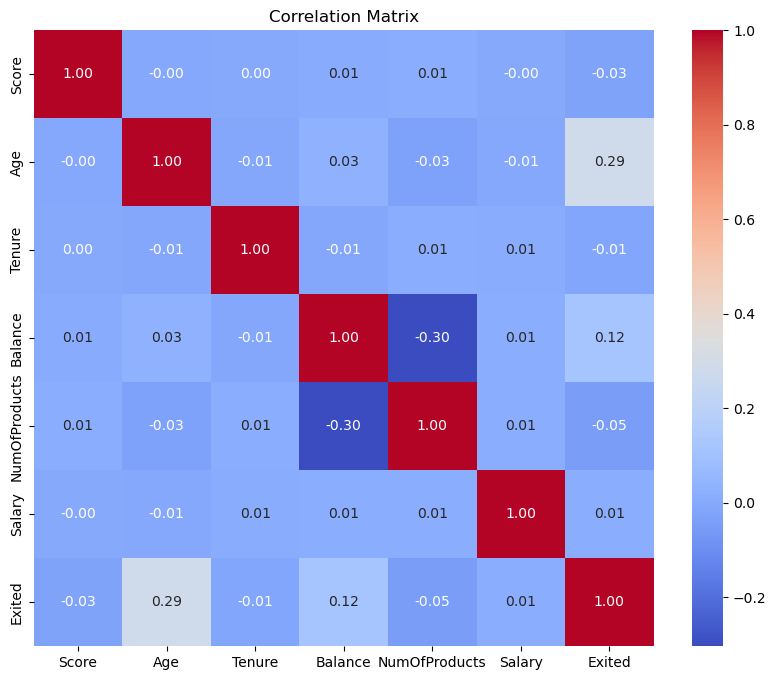

In [36]:
numeric_cols = ['Score', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Salary', 'Exited']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()